# <center>Data normalization with Pandas and Scikit-Learn

**https://towardsdatascience.com/data-normalization-with-pandas-and-scikit-learn-7c1cc6ed6475**

The success of a machine learning algorithm highly depends on the quality of the data fed into the model. Real-world data is often dirty containing outliers, missing values, wrong data types, irrelevant features, or non-standardized data. The presence of any of these will prevent the machine learning model to properly learn. For this reason, transforming raw data into a useful format is an essential stage in the machine learning process. One technique you will come across multiple times when pre-processing data is normalization.

Data Normalization is a common practice in machine learning which consists of transforming numeric columns to a common scale. In machine learning, some feature values differ from others multiple times. The features with higher values will dominate the learning process. However, it does not mean those variables are more important to predict the outcome of the model. Data normalization transforms multiscaled data to the same scale. After normalization, all variables have a similar influence on the model, improving the stability and performance of the learning algorithm.

**There are multiple normalization techniques we will cover the most important:**

**1. The maximum absolute scaling**


**2. The min-max feature scaling**

**3. The z-score method**

**4. The robust scaling**

**The following data frame contains the inputs (independent variables) of a multiple regression model for predicting the price of a second-hand car: (1) the odometer reading (km) and (2) the fuel economy (km/l). In this article, we use a small data set for learning purposes. However, in the real world, the data sets employed will be much larger.**

In [5]:
import pandas as pd 
from plotnine import ggplot , aes , geom_point, theme_minimal


In [6]:
# data frame containing the odometer reading (km) and the fuel economy (km/l) of second-hand cars
df_cars = pd.DataFrame([[120000, 11], [250000, 11.5], [175000, 15.8], [350000, 17], [400000, 10]],
                       columns=['odometer_reading', 'fuel_economy'])
df_cars

,odometer_reading,fuel_economy
0,120000,11.0
1,250000,11.5
2,175000,15.8
3,350000,17.0
4,400000,10.0


This short code example creates a plot from the df_cars dataset. Here’s a quick breakdown:


1. we import the **ggplot()** class as well as some useful functions from **plotnine**, **aes()** , **geom_point()** and **theme_minimal().**

2. we create a plot object using **ggplot()**, passing the **df_cars** DataFrame to the constructor.

3. we add **aes()** to set the variable to use for each axis, in this case **odometer_reading** and **fuel_economy.**

4. we add **geom_point()** to specify that the chart should be drawn as a scatter graph.


As we can observe, the odometer reading ranges from 120000 to 400000, while the fuel economy ranges from 10 to 17. The multiple linear regression model will weight the odometer reading variable more heavily than the fuel economy attribute due to its higher values. However, it does not mean that the odometer reading attribute is more important as a predictor. To solve this problem, we have to normalize the values of both variables. ❤️

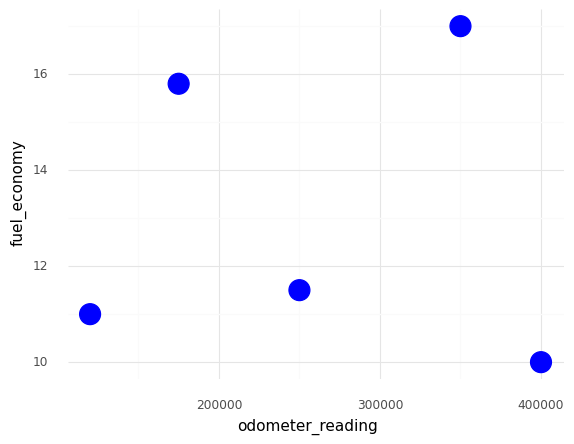

<ggplot: (160434642158)>

In [27]:
ggplot(df_cars) + aes(x ='odometer_reading' , y = 'fuel_economy') + geom_point(color = "blue" , size = 8) + theme_minimal()

# 1. The maximum absolute scaling

The maximum absolute scaling rescales each feature between -1 and 1 by dividing every observation by its maximum absolute value.

We can apply the maximum absolute scaling in Pandas using the .max() and .abs() methods, as shown below.

**x_scaled = x / max(|x|)**

In [43]:
df_cars.columns

Index(['odometer_reading', 'fuel_economy'], dtype='object')

In [44]:

# apply the maximum absolute scaling in Pandas using the .abs() and .max() methods

def maximum_absolute_scaling(df):
    # copy the dataframe
    df_scaled = df.copy()
    # apply maximum absolute scaling
    for column in df_scaled.columns:
        df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
    return df_scaled
    

# call the maximum_absolute_scaling function
df_cars_scaled = maximum_absolute_scaling(df_cars)

df_cars_scaled

,odometer_reading,fuel_economy
0,0.3000,0.647059
1,0.6250,0.676471
2,0.4375,0.929412
3,0.8750,1.000000
4,1.0000,0.588235



Alternatively, we can use the Scikit-learn library to compute the maximum absolute scaling: 
1. First, we create an abs_scaler with the MaxAbsScaler class. 
2. Then, we use the fit method to learn the required parameters for scaling the data (the maximum absolute value of each feature). 
3. Finally, we transform the data using those parameters.

In [45]:
from sklearn.preprocessing import MaxAbsScaler

# create an abs_scaler object
abs_scaler = MaxAbsScaler()

# calculate the maximum absolute value for scaling the data using the fit method
# transform the data using the parameters calculated by the fit method (the maximum absolute values)
scaled_data = abs_scaler.fit_transform(df_cars)

# store the results in a data frame
df_scaled = pd.DataFrame(scaled_data, columns=df_cars.columns)

# visualize the scaled data frame
df_scaled

,odometer_reading,fuel_economy
0,0.3000,0.647059
1,0.6250,0.676471
2,0.4375,0.929412
3,0.8750,1.000000
4,1.0000,0.588235


# 2. The min-max feature scaling


The **min-max** approach (often called **normalization**) rescales the feature to a fixed range of [0,1] by subtracting the minimum value of the feature and then dividing by the range.

**x_norm = (x - x_min) / (x_max - x_min)**

In [46]:
# apply the min-max scaling in Pandas using the .min() and .max() methods
def min_max_scaling(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm
    
# call the min_max_scaling function
df_cars_normalized = min_max_scaling(df_cars)

df_cars_normalized

,odometer_reading,fuel_economy
0,0.000000,0.142857
1,0.464286,0.214286
2,0.196429,0.828571
3,0.821429,1.000000
4,1.000000,0.000000


**Alternatively**, we can use the **MinMaxScaler** class available in the **Scikit-learn** library:
1. First, we create a **scaler** object. 
2. Then, we **fit** the **scaler** parameters, meaning we calculate the minimum and maximum value for each feature. 
3. Finally, we **transform** the data using those parameters. 

In [47]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()

# fit and transform the data
normad_data = scaler.fit_transform(df_cars)

# store the results in a data frame
df_norm = pd.DataFrame(normad_data, columns=df_cars.columns)

# visualize the scaled data frame
df_norm

,odometer_reading,fuel_economy
0,0.000000,0.142857
1,0.464286,0.214286
2,0.196429,0.828571
3,0.821429,1.000000
4,1.000000,0.000000


The following plot shows the data after applying the **min-max feature scaling**. As we can observe, this normalization technique rescales all feature values to be within the range of **[0, 1]**.

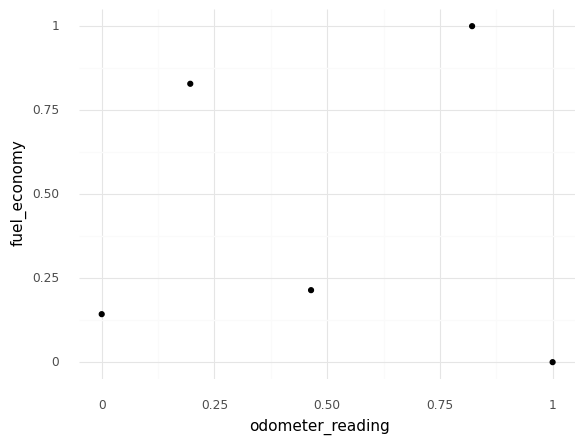

<ggplot: (159361687318)>

In [48]:
ggplot(df_norm) + aes(x ='odometer_reading' , y = 'fuel_economy' ) + geom_point() + theme_minimal()

**Note :** 
Furthermore, it is important to bear in mind that the **maximum absolute scaling** and the **min-max scaling** are very sensitive to **outliers** because a single outlier can influence the minimum and maximum values and have a **big effect** on the results.

# 3. The z-score method

The **z-score** method (often called **standardization**) **transforms the data into a distribution with a mean of 0 and a standard deviation of 1**. Each standardized value is computed by subtracting the mean of the corresponding feature and then dividing by the standard deviation.

Unlike **min-max scaling**, the **z-score** does not rescale the feature to a fixed range. The **z-score** typically ranges from -3.00 to 3.00 (more than 99% of the data) if the input is **normally distributed**. However, the standardized values can also be higher or lower.

It is important to bear in mind that **z-scores** are not necessarily normally distributed. They just scale the data and follow the same distribution as the original input. This transformed distribution has a mean of 0 and a standard deviation of 1 and is going to be the **standard normal** distribution (see the image above) only if the input feature follows a normal distribution.

**x_std = ( x - mean ) / standard deviation**

In [49]:
# apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std
    
# call the z_score function
df_cars_standardized = z_score(df_cars)

# visualize the scaled data frame
df_cars_standardized

,odometer_reading,fuel_economy
0,-1.189512,-0.659120
1,-0.077019,-0.499139
2,-0.718842,0.876693
3,0.778745,1.260647
4,1.206628,-0.979081


**Alternatively**,we can use the **StandardScaler** class available in the **Scikit-learn** library to perform the **z-score :**
1. First, we create a **standard_scaler object**. 
2. we calculate the parameters of the transformation (in this case the mean and the standard deviation) using the **.fit()** method. 
3. we call the **.transform()** method to apply the **standardization** to the data frame. The **.transform()** method uses the parameters generated from the **.fit()** method to perform the **z-score.**

In [51]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit and transform the data
data = scaler.fit_transform(df_cars)

# store the results in a data frame
df_std = pd.DataFrame(data , columns = df_cars.columns)

# visualize the scaled data frame
df_std

,odometer_reading,fuel_economy
0,-1.329915,-0.736918
1,-0.086110,-0.558055
2,-0.803690,0.980173
3,0.870664,1.409446
4,1.349051,-1.094646


1. As we can observe, the results differ from those obtained using **Pandas**. The **StandardScaler** function calculates the standard deviation where the sum of squares is divided by **n** (sample size).
2. **On the contrary**, the **.std()** method calculates the standard deviation where the denominator of the formula is **n-1** instead of **n**.
3. To obtain the same results with **Pandas**, we set the parameter **ddof** equal to **0** (default value is **ddof=1**) which represents the divisor used in the calculations **(n-ddof)**.

In [52]:
df_cars.std(ddof = 0)

odometer_reading    104517.941044
fuel_economy             2.795425
dtype: float64

We can obtain the parameters calculated by the **fit** function for **standardizing** the data with the **mean_** and **scale_** attributes. As we can observe, we obtain the same results in **Scikit-learn** and **Pandas** when setting the parameter **ddof** equals to **0** in the **.std()** method.

In [55]:
# standard deviation for standardizing the data
scaler.scale_

array([1.04517941e+05, 2.79542483e+00])

In [ ]:
# mean for standardizing the data
scaler.mean_

# 4. The Robust Scaling

In **robust scaling**, we scale each feature of the data set by subtracting the **median** and then dividing by the **interquartile range**. The **interquartile range (IQR)** is defined as the difference between the third and the first **quartile** and represents the central 50% of the data. Mathematically the robust scaler can be expressed as:

**x_rs = (x - median ) / IQR**

This method comes in handy when working with data sets that contain many **outliers** because it uses statistics that are robust to **outliers** (**median** and **interquartile range**), in contrast with the previous scalers, which use statistics that are highly affected by **outliers** such as the **maximum**, the **minimum**, the **mean**, and the **standard deviation**.

As we previously did, we can perform **robust scaling** using **Pandas** to the **cars** dataset : 
1. The **median** is defined as the midpoint of the distribution, meaning 50% of the values of the distribution are smaller than the **median.** 
2. In **Pandas**, we can calculate it with the **.median()** or the **.quantile(0.5)** methods. The **first quartile** is the **median** of the lower half of the data set (25% of the values lie below the first quartile) and can be calculated with the **.quantile(0.25)** method. The **third quartile** represents the median of the upper half of the data set (75% of the values lie below the third quartile) and can be calculated with the **.quantile(0.75)** method.

In [18]:
# define the robust_scaler function 
def robust_scaler(df):
    df_rs = df.copy()
    
    for column in df_rs.columns :
        df_rs[column] = ( df_rs[column] - df_rs[column].median() ) / ( df_rs[column].quantile(0.75) - df_rs[column].quantile(0.25))
    
    return(df_rs)

# call the robust_scaler function
df_cars_rs = robust_scaler(df_cars)

# visualize the scaled data frame
df_cars_rs


,odometer_reading,fuel_economy
0,-0.742857,-0.104167
1,0.000000,0.000000
2,-0.428571,0.895833
3,0.571429,1.145833
4,0.857143,-0.312500


As an **alternative** to **Pandas**, we can also perform **robust scaling** using the **Scikit-learn** library.

In [ ]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()



In [19]:
from sklearn.preprocessing import RobustScaler

# create a scaler object
scaler = RobustScaler()

# fit and transform the data
data = scaler.fit_transform(df_cars)

# store the results in a data frame
df_rs = pd.DataFrame(data , columns = df_cars.columns)

# visualize the scaled data frame
df_rs

,odometer_reading,fuel_economy
0,-0.742857,-0.104167
1,0.000000,0.000000
2,-0.428571,0.895833
3,0.571429,1.145833
4,0.857143,-0.312500


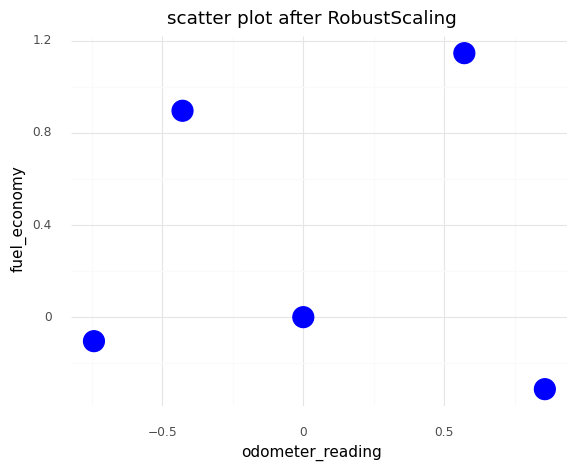

<ggplot: (160432892025)>

In [25]:
from plotnine import ggplot , aes , geom_point , theme_minimal , labs

ggplot(df_rs) + aes( x = 'odometer_reading', y ='fuel_economy') + geom_point(color = "blue" , size =8) + labs(title = "scatter plot after RobustScaling") + theme_minimal()

# Comparison Between MinMaxScalr and RobustScaler

Let’s see how **outliers** affect the results after scaling the data with **min-max scaling** and **robust scaling**.

In [2]:
# The following data set contains 10 data points, one of them being an outlier (variable1 = 30).

df_data = pd.DataFrame({'variable1':[1,2,3,4,5,6,7,30], 'variable2':[1,2,3,4,5,6,7,8]})

df_data

,variable1,variable2
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,6,6
6,7,7
7,30,8


**Scaling The dataset df_data with the MinMaxScaler :**  

The min-max scaling shifts the variable 1 towards 0 due to the presence of an outlier as compared with variable 2 where the points are evenly distributed in a range from 0 to 1.

In [3]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()

# fit and transform the data
data = scaler.fit_transform(df_data)

# store the results in a data frame
df_norm = pd.DataFrame(data , columns = df_data.columns)

# visualize the scaled data frame
df_norm

,variable1,variable2
0,0.000000,0.000000
1,0.034483,0.142857
2,0.068966,0.285714
3,0.103448,0.428571
4,0.137931,0.571429
5,0.172414,0.714286
6,0.206897,0.857143
7,1.000000,1.000000


In [8]:
df_data.columns

Index(['variable1', 'variable2'], dtype='object')

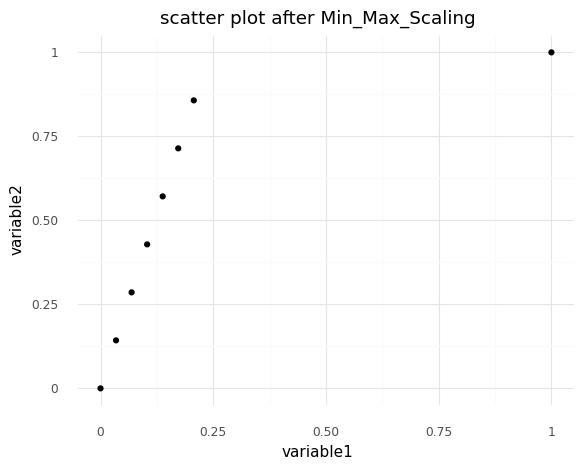

<ggplot: (160432927922)>

In [11]:
from plotnine import ggplot , aes , geom_point , theme_minimal , labs

ggplot(df_norm) + aes( x = 'variable1', y ='variable2') + geom_point() + labs(title = "scatter plot after Min_Max_Scaling") + theme_minimal()

1. Before scaling, the first data point has a value of (1,1), both variable 1 and variable 2 have equal values. Once transformed, the value of variable 2 is much larger than variable 1 (0.034,0.142). This is because variable 1 has an **outlier**.
2. On the contrary, if we apply **robust scaling**, both variables have the same values (-1.00,-1.00) after the transformation, because both features have the same **median** and **interquartile range**, being the **outlier** the value that is shifted.

# Summary

**Data normalization consists of transforming numeric columns to a common scale. In Python, we can implement data normalization in a very simple way. The Pandas library contains multiple built-in methods for calculating the most common descriptive statistical functions which make data normalization techniques really easy to implement. As another option, we can use the Scikit-Learn library to transform the data into a common scale. In this library, the most frequent scaling methods are already implemented.
Besides data normalization, there are multiple data pre-processing techniques we have to apply to guarantee the performance of the learning algorithm.**

# Pipeline

Pipelines work by allowing for a linear sequence of data transforms to be chained together culminating in a modeling process that can be evaluated.

In [25]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])